In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import re

%matplotlib inline
sns.set_palette("pastel")

## World Bank data related to trade flows

#### Few countries outside of the cluster of the Western economies have managed to reach the status of developed. My hypothesis explores the possibility that trade can influence and have a high impact on the economic growth of countries. In this project I compare the top 4 Asian economies (excluding China) and top 4 Latin American economies (taking more into account the impact they can have on trade flows, rather than their current stagnation). 

### Data Preparation
Exploring the data, format, values and other aspects of it to clean it thereafter and conduct timely analysis

In [2]:
countries = pd.read_csv('Countries_CSVs/new_countries.csv')
definitions = pd.read_csv('Countries_CSVs/new_definitions.csv')


In [3]:
# Checking datatypes and exploring datq
countries.dtypes

Country Name      object
Country Code      object
Series Name       object
Series Code       object
1960 [YR1960]     object
                  ...   
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]    float64
2019 [YR2019]     object
Length: 64, dtype: object

In [4]:
definitions.dtypes

Code                                   object
License Type                           object
Indicator Name                         object
Long definition                        object
Source                                 object
Topic                                  object
Periodicity                            object
Aggregation method                     object
Statistical concept and methodology    object
Development relevance                  object
Limitations and exceptions             object
General comments                       object
License URL                            object
dtype: object

In [5]:
countries.head(15)

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Indonesia,IDN,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,12.5576627370579,13.6141246543289,5.39285446783012,9.34928945400149,13.0651153010444,5.73597638127372,...,2.240224e+01,2.385266e+01,2.498852e+01,2.471380e+01,2.441419e+01,2.077746e+01,1.833235e+01,1.917819e+01,2.202972e+01,18.8958822798066
1,Indonesia,IDN,Imports of goods and services (annual % growth),NE.IMP.GNFS.KD.ZG,..,34.6938775511049,-1.96969696971165,-26.5842349304464,8.84210526294696,-8.12379110233644,...,1.734432e+01,1.502888e+01,7.998411e+00,1.861897e+00,2.119702e+00,-6.249011e+00,-2.405113e+00,8.067946e+00,1.188120e+01,-7.68714262634181
2,Indonesia,IDN,"Imports of goods and services (BoP, current US$)",BM.GSR.GNFS.CD,..,..,..,..,..,..,...,1.454242e+11,1.889751e+11,2.128910e+11,2.112702e+11,2.018508e+11,1.659935e+11,1.595590e+11,1.827754e+11,2.186452e+11,204342917226.159
3,Indonesia,IDN,Imports of goods and services (current US$),NE.IMP.GNFS.CD,..,..,..,..,..,..,...,1.691580e+11,2.129969e+11,2.293621e+11,2.255194e+11,2.174852e+11,1.788637e+11,1.708350e+11,1.947773e+11,2.296027e+11,211480972417.496
4,Indonesia,IDN,"Service imports (BoP, current US$)",BM.GSR.NFSV.CD,..,..,..,..,..,..,...,2.646099e+10,3.169142e+10,3.422407e+10,3.501425e+10,3.354062e+10,3.091755e+10,3.040721e+10,3.270682e+10,3.769192e+10,39398285119.7917
5,Indonesia,IDN,"Goods imports (BoP, current US$)",BM.GSR.MRCH.CD,..,..,..,..,..,..,...,1.189632e+11,1.572837e+11,1.786670e+11,1.762560e+11,1.683102e+11,1.350759e+11,1.291518e+11,1.500686e+11,1.809533e+11,164944632106.367
6,Indonesia,IDN,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,11.5325474115838,11.0614762816422,5.1681521983372,9.06881077038145,12.2520501857433,5.2762547448334,...,2.429903e+01,2.632735e+01,2.459438e+01,2.392358e+01,2.366598e+01,2.116018e+01,1.908899e+01,2.017730e+01,2.097222e+01,18.4075155786612
7,Indonesia,IDN,Exports of goods and services (annual % growth),NE.EXP.GNFS.KD.ZG,..,9.03846153842458,-8.64197530862099,-5.98455598453009,11.9096509240471,3.11926605503989,...,1.526632e+01,1.476992e+01,1.608749e+00,4.166958e+00,1.074640e+00,-2.120240e+00,-1.660509e+00,8.897292e+00,6.546525e+00,-0.873171485478636
8,Indonesia,IDN,"Exports of goods and services (BoP, current US$)",BX.GSR.GNFS.CD,..,..,..,..,..,..,...,1.666363e+11,2.129969e+11,2.110066e+11,2.050331e+11,1.988237e+11,1.713454e+11,1.677933e+11,1.942102e+11,2.119318e+11,200099948968.349
9,Indonesia,IDN,Exports of goods and services (current US$),NE.EXP.GNFS.CD,..,..,..,..,..,..,...,1.834806e+11,2.350951e+11,2.257444e+11,2.183084e+11,2.108201e+11,1.821583e+11,1.778860e+11,2.049245e+11,2.185809e+11,206015217322.011


In [6]:
definitions.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.NFSV.CD,BX.GSR.MRCH.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD,For more information on underlying population,For the concept and methodology of PPP
License Type,CC BY-4.0,CC BY-4.0,CC BY-4.0,CC BY-4.0,CC BY-4.0,CC BY-4.0,CC BY-4.0,CC BY-4.0,CC BY-4.0,CC BY-4.0,CC BY-4.0,CC BY-4.0,CC BY-4.0,CC BY-4.0,"please refer to the metadata for ""total popul...",please refer to the International Comparison ...
Indicator Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Service exports (BoP, current US$)","Goods exports (BoP, current US$)",GDP growth (annual %),"GDP per capita, PPP (current international $)",NaN,NaN
Long definition,Imports of goods and services represent the va...,Annual growth rate of imports of goods and ser...,Imports of goods and services comprise all tra...,Imports of goods and services represent the va...,Services refer to economic output of intangibl...,Goods imports refer to all movable goods (incl...,Exports of goods and services represent the va...,Annual growth rate of exports of goods and ser...,Exports of goods and services comprise all tra...,Exports of goods and services represent the va...,Services refer to economic output of intangibl...,Goods exports refer to all movable goods (incl...,Annual percentage growth rate of GDP at market...,This indicator provides per capita values for ...,NaN,NaN
Source,"World Bank national accounts data, and OECD Na...","World Bank national accounts data, and OECD Na...","International Monetary Fund, Balance of Paymen...","World Bank national accounts data, and OECD Na...","International Monetary Fund, Balance of Paymen...","International Monetary Fund, Balance of Paymen...","World Bank national accounts data, and OECD Na...","World Bank national accounts data, and OECD Na...","International Monetary Fund, Balance of Paymen...","World Bank national accounts data, and OECD Na...","International Monetary Fund, Balance of Paymen...","International Monetary Fund, Balance of Paymen...","World Bank national accounts data, and OECD Na...","International Comparison Program, World Bank |...",NaN,NaN
Topic,Economic Policy & Debt: National accounts: Sha...,Economic Policy & Debt: National accounts: Gro...,Economic Policy & Debt: Balance of payments: C...,Economic Policy & Debt: National accounts: US$...,Economic Policy & Debt: Balance of payments: C...,Economic Policy & Debt: Balance of payments: C...,Economic Policy & Debt: National accounts: Sha...,Economic Policy & Debt: National accounts: Gro...,Economic Policy & Debt: Balance of payments: C...,Economic Policy & Debt: National accounts: US$...,Economic Policy & Debt: Balance of payments: C...,Economic Policy & Debt: Balance of payments: C...,Economic Policy & Debt: National accounts: Gro...,Economic Policy & Debt: Purchasing power parity,NaN,https://datacatalog.worldbank.org/public-licen...
Periodicity,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,NaN,NaN
Aggregation method,Weighted average,Weighted average,Gap-filled total,Gap-filled total,Gap-filled total,Gap-filled total,Weighted average,Weighted average,Gap-filled total,Gap-filled total,Gap-filled total,Gap-filled total,Weighted average,Weighted average,NaN,NaN
Statistical concept and methodology,Gross domestic product (GDP) from the expendit...,NaN,The balance of payments (BoP) is a double-entr...,Gross domestic product (GDP) from the expe

In [7]:
definitions.loc[12, 'Long definition']

'Annual percentage growth rate of GDP at market prices based on constant local currency. Aggregates are based on constant 2010 U.S. dollars. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.'

In [8]:
countries.shape

(117, 64)

In [9]:
# All values are objects. Corresponding columns will be afterwards turned into floats and rounded to have better handling. 
countries.dtypes

Country Name      object
Country Code      object
Series Name       object
Series Code       object
1960 [YR1960]     object
                  ...   
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]    float64
2019 [YR2019]     object
Length: 64, dtype: object

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
# Using years as rows for countries dataset
countries = countries.transpose()


In [12]:
nulls_countries = countries.columns[countries.isnull().any()].tolist()

In [13]:
nulls_countries

[112, 113, 114, 115, 116]

In [14]:
# Looking into the columns with null values
countries[[112]].head()

,112
Country Name,NaN
Country Code,NaN
Series Name,NaN
Series Code,NaN
1960 [YR1960],NaN


In [15]:
for n in nulls_countries:
    print(countries[n].isnull().sum()/100)

0.64
0.64
0.64
0.63
0.63


In [16]:
#Drop columns with NAN values
countries = countries.drop(nulls_countries, axis=1)

## Fixing index 

In [17]:
countries.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            102, 103, 104, 105, 106, 107, 108, 109, 110, 111],
           dtype='int64', length=112)

In [18]:
countries

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
Country Name,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,...,Chile,Chile,Chile,Chile,Chile,Chile,Chile,Chile,Chile,Chile
Country Code,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,...,CHL,CHL,CHL,CHL,CHL,CHL,CHL,CHL,CHL,CHL
Series Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),...,"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Service exports (BoP, current US$)","Goods exports (BoP, current US$)",GDP growth (annual %),"GDP per capita, PPP (current international $)"
Series Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,...,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.NFSV.CD,BX.GSR.MRCH.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD
1960 [YR1960],12.5576627370579,..,..,..,..,..,11.5325474115838,..,..,..,...,..,..,13.0561786878124,..,..,536608944.069088,..,..,..,..
1961 [YR1961],13.6141246543289,34.6938775511049,..,..,..,..,11.0614762816422,9.03846153842458,..,..,...,..,..,11.4045154886266,4.94457618496662,..,525717060.801627,..,..,5.24527188577721,..
1962 [YR1962],5.39285446783012,-1.96969696971165,..,..,..,..,5.1681521983372,-8.64197530862099,..,..,...,..,..,11.3512091033145,2.60928358373558,..,614812442.87852,..,..,4.02668562467936,..
1963 [YR1963],9.34928945400149,-26.5842349304464,..,..,..,..,9.06881077038145,-5.98455598453009,..,..,...,..,..,12.2978637668483,5.26926591953077,..,697065976.799525,..,..,5.84014013697538,..
1964 [YR1964],13.0651153010444,8.84210526294696,..,..,..,..,12.2520501857433,11.9096509240471,..,..,...,..,..,12.2491437471045,9.22865975632796,..,732786384.66917,..,..,2.55722054231921,..
1965 [YR1965],5.73597638127372,-8.12379110233644,..,..,..,..,5.2762547448334,3.11926605503989,..,..,...,..,..,13.2775042844486,-0.844559144624952,..,800181243.362563,..,..,0.950272505266042,..


In [19]:
countries.columns=countries.iloc[0]

In [20]:
countries = countries.drop(countries.index[0])

In [21]:
countries

Country Name,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,...,Chile,Chile,Chile,Chile,Chile,Chile,Chile,Chile,Chile,Chile
Country Code,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,...,CHL,CHL,CHL,CHL,CHL,CHL,CHL,CHL,CHL,CHL
Series Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),...,"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Service exports (BoP, current US$)","Goods exports (BoP, current US$)",GDP growth (annual %),"GDP per capita, PPP (current international $)"
Series Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,...,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.NFSV.CD,BX.GSR.MRCH.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD
1960 [YR1960],12.5576627370579,..,..,..,..,..,11.5325474115838,..,..,..,...,..,..,13.0561786878124,..,..,536608944.069088,..,..,..,..
1961 [YR1961],13.6141246543289,34.6938775511049,..,..,..,..,11.0614762816422,9.03846153842458,..,..,...,..,..,11.4045154886266,4.94457618496662,..,525717060.801627,..,..,5.24527188577721,..
1962 [YR1962],5.39285446783012,-1.96969696971165,..,..,..,..,5.1681521983372,-8.64197530862099,..,..,...,..,..,11.3512091033145,2.60928358373558,..,614812442.87852,..,..,4.02668562467936,..
1963 [YR1963],9.34928945400149,-26.5842349304464,..,..,..,..,9.06881077038145,-5.98455598453009,..,..,...,..,..,12.2978637668483,5.26926591953077,..,697065976.799525,..,..,5.84014013697538,..
1964 [YR1964],13.0651153010444,8.84210526294696,..,..,..,..,12.2520501857433,11.9096509240471,..,..,...,..,..,12.2491437471045,9.22865975632796,..,732786384.66917,..,..,2.55722054231921,..
1965 [YR1965],5.73597638127372,-8.12379110233644,..,..,..,..,5.2762547448334,3.11926605503989,..,..,...,..,..,13.2775042844486,-0.844559144624952,..,800181243.362563,..,..,0.950272505266042,..
1966 [YR1966],22.0955998733777,-4.2105263157203,..,..,..,..,12.7572016460905,-1.06761565839287,..,..,...,..,..,14.3402501357152,4.01002160927375,..,1014234414.27814,..,..,11.2362424530091,..


### Making each country into a dataframe because per country each column's name has the name of the country

In [22]:
# Initial idea on how to seperate each country in a dataframe
countries.filter(like='Brazil')

Country Name,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil
Country Code,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA
Series Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Service exports (BoP, current US$)","Goods exports (BoP, current US$)",GDP growth (annual %),"GDP per capita, PPP (current international $)"
Series Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.NFSV.CD,BX.GSR.MRCH.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD
1960 [YR1960],7.11728554327239,..,..,1079376914.93865,..,..,7.05904647646368,..,..,1070544628.54537,..,..,..,..
1961 [YR1961],7.33945907077904,-3.48843308833531,..,1118302726.08473,..,..,7.27940794590105,5.19408591869809,..,1109152823.34559,..,..,10.275911554301,..
1962 [YR1962],5.18897394767796,-1.20431186245116,..,1033970196.04432,..,..,3.86876017137378,-7.40697094349359,..,770900519.674771,..,..,5.21605942017898,..
1963 [YR1963],9.11100002127562,-2.43879567951019,..,2097486800.99115,..,..,9.03645424482606,27.9999537191722,..,2080325261.99351,..,..,0.874672592408302,..
1964 [YR1964],5.6776000056402,-12.5004082704348,..,1204326396.14961,..,..,6.38540927082227,-13.5418615762703,..,1354466134.88626,..,..,3.4855823042772,..
1965 [YR1965],5.55592484290456,-14.2862484150039,..,1210637974.35359,..,..,7.73576138413985,3.61684823505183,..,1685625122.1861,..,..,3.05348789366924,..
1966 [YR1966],5.99166922704867,31.6662865082342,..,1621508461.2021,..,..,6.82473507896306,11.6278405073585,..,1846958711.61305,..,..,4.15036023303348,..


In [23]:
countries_columns = list(countries.columns.unique())

In [24]:
countries_columns

['Indonesia',
 'Japan',
 'Korea, Rep.',
 'India',
 'Brazil',
 'Mexico',
 'Argentina',
 'Chile']

In [25]:
country = {}
for name in countries_columns:
    country[name] = pd.DataFrame(countries.filter(like=name))

In [26]:
country['Argentina']

Country Name,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina
Country Code,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG
Series Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Service exports (BoP, current US$)","Goods exports (BoP, current US$)",GDP growth (annual %),"GDP per capita, PPP (current international $)"
Series Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.NFSV.CD,BX.GSR.MRCH.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD
1960 [YR1960],7.60404697912324,..,..,..,..,..,7.60404910825644,..,..,..,..,..,..,..
1961 [YR1961],5.99494531619397,18.1768928497726,..,..,..,..,5.9949469947787,-10.6385917324185,..,..,..,..,5.42784287951248,..
1962 [YR1962],9.38368289056535,0,..,2294367226.53985,..,..,4.69184275899831,45.2384632307518,..,1147183934.48134,..,..,-0.852021523481966,..
1963 [YR1963],7.89045203275027,-23.0833969136606,..,1441753153.10994,..,..,7.89045420262462,0,..,1441753549.59206,..,..,-5.30819682651727,..
1964 [YR1964],5.56371407476368,20.0123928703162,..,1424602863.7313,..,..,5.56371560478508,-8.19666133346863,..,1424603255.4971,..,..,10.1302976614338,..
1965 [YR1965],4.15058297228058,0,..,1176470539.39431,..,..,6.22587443766796,8.92850026211178,..,1764705803.20912,..,..,10.5694333403429,..
1966 [YR1966],4.98968803354159,-8.3311443548433,..,1428571371.44429,..,..,6.65291738359955,16.3934313399595,..,1904761830.17968,..,..,-0.659726171593704,..


## Renaming columns

In [27]:
type(country['Argentina'])

pandas.core.frame.DataFrame

In [28]:
#column identifiers
(country['Argentina']).loc['Series Name',:]

Country Name
Argentina            Imports of goods and services (% of GDP)
Argentina     Imports of goods and services (annual % growth)
Argentina    Imports of goods and services (BoP, current US$)
Argentina         Imports of goods and services (current US$)
Argentina                  Service imports (BoP, current US$)
Argentina                    Goods imports (BoP, current US$)
Argentina            Exports of goods and services (% of GDP)
Argentina     Exports of goods and services (annual % growth)
Argentina    Exports of goods and services (BoP, current US$)
Argentina         Exports of goods and services (current US$)
Argentina                  Service exports (BoP, current US$)
Argentina                    Goods exports (BoP, current US$)
Argentina                               GDP growth (annual %)
Argentina       GDP per capita, PPP (current international $)
Name: Series Name, dtype: object

### The meaning of the new column names to be used as reference

|Column Identifier | Meaning |
| --- | --- |
| IM_GDP_P | Imports of goods and services (% of GDP) |
| IM_Growth_P | Imports of goods and services (annual % growth) |
| IM_BoP | Imports of goods and services (current US dollar) |
| IM_dll | Imports of goods and services (current US dollar) |
| IM_Services_dll | Service imports (BoP, current US dollar) |
| IM_Goods_dll | Goods imports (BoP, current US dollar) |
| EX_GDP_P | Exports of goods and services (% of GDP) |
| EX_Growth_P | Exports of goods and services (annual % growth) |
| EX_BoP | Exports of goods and services (BoP, current US dollar) |
| EX_dll | Exports of goods and services (current US dollar) |
| EX_Services_dll | Service exports (BoP, current US dollar) | 
| EX_Goods_dll | Goods exports (BoP, current US dollar) |
| GDP_PPP | GDP per capita, PPP (current international dollar) |
| GDP_Growth_P | GDP growth (annual %) |


In [29]:
column_names = ['IM_GDP_P', 'IM_Growth_P', 'IM_BoP', 'IM_dll', 'IM_Services_dll', 'IM_Goods_dll', 'EX_GDP_P', 'EX_Growth_P', 'EX_BoP', 'EX_dll', 'EX_Services_dll', 'EX_Goods_dll', 'GDP_Growth_P', 'GDP_PPP_dll']

In [30]:
(country['Argentina']).columns = column_names

In [31]:
# renaming columns for each country dataframe
for cols in countries_columns:
    (country[cols]).columns = column_names

In [32]:
country['Mexico'].head()

,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Services_dll,EX_Goods_dll,GDP_Growth_P,GDP_PPP_dll
Country Code,MEX,MEX,MEX,MEX,MEX,MEX,MEX,MEX,MEX,MEX,MEX,MEX,MEX,MEX
Series Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Service exports (BoP, current US$)","Goods exports (BoP, current US$)",GDP growth (annual %),"GDP per capita, PPP (current international $)"
Series Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.NFSV.CD,BX.GSR.MRCH.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD
1960 [YR1960],11.6636809815951,..,..,1520944000,..,..,8.50552147239264,..,..,1109120000,..,..,..,..
1961 [YR1961],10.6152542372881,-1.17440659755447,..,1503120000,..,..,8.41248587570621,8.84211608345005,..,1191208000,..,..,5.0000000024334,..


## Exploring the null values

In [33]:
country['Argentina'].isnull().sum()

IM_GDP_P           0
IM_Growth_P        0
IM_BoP             0
IM_dll             0
IM_Services_dll    0
IM_Goods_dll       0
EX_GDP_P           0
EX_Growth_P        0
EX_BoP             0
EX_dll             0
EX_Services_dll    0
EX_Goods_dll       0
GDP_Growth_P       0
GDP_PPP_dll        0
dtype: int64

In [34]:
country['Argentina'].isin(['..']).any()

IM_GDP_P           False
IM_Growth_P         True
IM_BoP              True
IM_dll              True
IM_Services_dll     True
IM_Goods_dll        True
EX_GDP_P           False
EX_Growth_P         True
EX_BoP              True
EX_dll              True
EX_Services_dll     True
EX_Goods_dll        True
GDP_Growth_P        True
GDP_PPP_dll         True
dtype: bool

In [35]:
#countries missing data until 1989

#Reason according to the World Bank:
#'Government finance statistics uses updated indicator definitions and 
#methodology which only allowed for a consistent time series beginning 
#no earlier than 1990.'
country['Indonesia'][country['Indonesia'].isin(['..'])].stack()

1960 [YR1960]  IM_Growth_P        ..
               IM_BoP             ..
               IM_dll             ..
               IM_Services_dll    ..
               IM_Goods_dll       ..
               EX_Growth_P        ..
               EX_BoP             ..
               EX_dll             ..
               EX_Services_dll    ..
               EX_Goods_dll       ..
               GDP_Growth_P       ..
               GDP_PPP_dll        ..
1961 [YR1961]  IM_BoP             ..
               IM_dll             ..
               IM_Services_dll    ..
               IM_Goods_dll       ..
               EX_BoP             ..
               EX_dll             ..
               EX_Services_dll    ..
               EX_Goods_dll       ..
               GDP_PPP_dll        ..
1962 [YR1962]  IM_BoP             ..
               IM_dll             ..
               IM_Services_dll    ..
               IM_Goods_dll       ..
               EX_BoP             ..
               EX_dll             ..
 

In [36]:
# All contries missing: 1960 Imports of goods and services (annual % growth)
# Hong Kong missing 1960 and 1961
country['Indonesia']['GDP_Growth_P']

Country Code                       IDN
Series Name      GDP growth (annual %)
Series Code          NY.GDP.MKTP.KD.ZG
1960 [YR1960]                       ..
1961 [YR1961]         5.74064582266813
1962 [YR1962]         1.84197770236842
1963 [YR1963]        -2.23702998571657
1964 [YR1964]         3.52969814993797
1965 [YR1965]         1.08158946626055
1966 [YR1966]         2.79134682484525
1967 [YR1967]         1.38040280607036
1968 [YR1968]         10.9151785714295
1969 [YR1969]         6.82229824913611
1970 [YR1970]         7.55463451394223
1971 [YR1971]         7.02399719740848
1972 [YR1972]         7.03764320785962
1973 [YR1973]          8.1039755351653
1974 [YR1974]          7.6346729055067
1975 [YR1975]         4.97730086669512
1976 [YR1976]         6.88656497352524
1977 [YR1977]         8.76132560106355
1978 [YR1978]          6.7670698576317
1979 [YR1979]         7.32430948559606
1980 [YR1980]         9.88007752166418
1981 [YR1981]         7.92715682412874
1982 [YR1982]         2.2

## Reference table for missing values

Table showing when the columns with '..' start showing data. This table will be used as reference to be able to turn the '..' into zeroes and transform the object values into floats.

| Measure Imports & Exports| Data available since year |
| --- | --- |
| GDP Growth | 1960s/1961 |
| Goods and services % growth | 1961 |
| Balance of Payments in dlls | 1981 |
| Current dll value | 1967 |
| Services in dlls | 1981 |
| Goods in dlls | 1981 |
| GDP per capita/ PPP | 1990 |
| GDP Growth % | 1990 |

In [37]:
country['Mexico'][country['Mexico'].isin(['0'])].stack()

Series([], dtype: object)

## Replacing '..' and turning corresponding values to floats

In [38]:
country['Argentina'].shape

(63, 14)

In [39]:
# Replacing '..' with zeroes
for dots in countries_columns:
    country[dots] = country[dots].replace('..', 0)

In [40]:
# First three rows are objects. Slicing the dataframe to consider numeric 
# values and converting values to floats 
for objects in countries_columns:
    country[objects] = country[objects].iloc[3:63,:].astype(float).round(4)


In [41]:
country['Indonesia'].dtypes

IM_GDP_P           float64
IM_Growth_P        float64
IM_BoP             float64
IM_dll             float64
IM_Services_dll    float64
IM_Goods_dll       float64
EX_GDP_P           float64
EX_Growth_P        float64
EX_BoP             float64
EX_dll             float64
EX_Services_dll    float64
EX_Goods_dll       float64
GDP_Growth_P       float64
GDP_PPP_dll        float64
dtype: object

In [42]:
country['Indonesia'].head()

,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Services_dll,EX_Goods_dll,GDP_Growth_P,GDP_PPP_dll
1960 [YR1960],12.5577,0.0000,0.0,0.0,0.0,0.0,11.5325,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0
1961 [YR1961],13.6141,34.6939,0.0,0.0,0.0,0.0,11.0615,9.0385,0.0,0.0,0.0,0.0,5.7406,0.0
1962 [YR1962],5.3929,-1.9697,0.0,0.0,0.0,0.0,5.1682,-8.6420,0.0,0.0,0.0,0.0,1.8420,0.0
1963 [YR1963],9.3493,-26.5842,0.0,0.0,0.0,0.0,9.0688,-5.9846,0.0,0.0,0.0,0.0,-2.2370,0.0
1964 [YR1964],13.0651,8.8421,0.0,0.0,0.0,0.0,12.2521,11.9097,0.0,0.0,0.0,0.0,3.5297,0.0


In [43]:
pd.reset_option("display.max_rows")

## Suppressing scientific notation

#### for better understanding of the numeric values and for comparison

In [44]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [45]:
country['India'].head()

,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Services_dll,EX_Goods_dll,GDP_Growth_P,GDP_PPP_dll
1960 [YR1960],6.834,0.000,0.000,2530502530.503,0.000,0.000,4.463,0.000,0.000,1652701652.702,0.000,0.000,0.000,0.000
1961 [YR1961],5.958,-9.756,0.000,2337302337.302,0.000,0.000,4.304,-0.186,0.000,1688401688.402,0.000,0.000,3.723,0.000
1962 [YR1962],6.032,3.909,0.000,2543102543.102,0.000,0.000,4.169,-0.580,0.000,1757701757.702,0.000,0.000,2.931,0.000
1963 [YR1963],5.907,3.392,0.000,2860202860.203,0.000,0.000,4.280,8.404,0.000,2072702072.702,0.000,0.000,5.994,0.000
1964 [YR1964],5.685,3.380,0.000,3210903210.903,0.000,0.000,3.726,-6.512,0.000,2104202104.202,0.000,0.000,7.453,0.000


In [46]:
#Having year in it's own column
#country['Argentina'] = country['Argentina'].reset_index()

for i in countries_columns:
    country[i] = country[i].reset_index()

In [47]:
# renaming column 'index' to 'Year'

for year in countries_columns:
    country[year] = country[year].rename(columns={'index':'Year'})

## Removing [Year] from year column

In [48]:
#country['Argentina']['Year']= country['Argentina']['Year'].apply(lambda x: re.sub(r"\[.*\]", "", x))

for a in countries_columns:
    country[a]['Year']= country[a]['Year'].apply(lambda x: re.sub(r"\[.*\]", "", x))

In [49]:
country['Brazil'].head()

,Year,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Services_dll,EX_Goods_dll,GDP_Growth_P,GDP_PPP_dll
0,1960,7.117,0.000,0.000,1079376914.939,0.000,0.000,7.059,0.000,0.000,1070544628.545,0.000,0.000,0.000,0.000
1,1961,7.340,-3.488,0.000,1118302726.085,0.000,0.000,7.279,5.194,0.000,1109152823.346,0.000,0.000,10.276,0.000
2,1962,5.189,-1.204,0.000,1033970196.044,0.000,0.000,3.869,-7.407,0.000,770900519.675,0.000,0.000,5.216,0.000
3,1963,9.111,-2.439,0.000,2097486800.991,0.000,0.000,9.037,28.000,0.000,2080325261.993,0.000,0.000,0.875,0.000
4,1964,5.678,-12.500,0.000,1204326396.150,0.000,0.000,6.385,-13.542,0.000,1354466134.886,0.000,0.000,3.486,0.000


In [50]:
# Converting 'Year' object into an integer
for number in countries_columns:
    country[number]['Year'] = country[number]['Year'].astype(int)

In [51]:
country['Argentina'].dtypes

Year                 int32
IM_GDP_P           float64
IM_Growth_P        float64
IM_BoP             float64
IM_dll             float64
IM_Services_dll    float64
IM_Goods_dll       float64
EX_GDP_P           float64
EX_Growth_P        float64
EX_BoP             float64
EX_dll             float64
EX_Services_dll    float64
EX_Goods_dll       float64
GDP_Growth_P       float64
GDP_PPP_dll        float64
dtype: object

## Adding a column with Country name to use after as identifier

In [52]:
len(country['Argentina'])

60

In [53]:
'a' * 6

'aaaaaa'

In [54]:
# abbreviation of countries
#'BR', 'AG', 'MX', 'CH', 'HK', 'SG', 'KR', 'ID'

country['Argentina']['Country Name'] = (['AG'] * 60) 

In [55]:
country['Japan']['Country Name'] = (['JP'] * 60)
country['Mexico']['Country Name'] = (['MX'] * 60) 
country['Chile']['Country Name'] = (['CH'] * 60)
country['India']['Country Name'] = (['IN'] * 60)
country['Brazil']['Country Name'] = (['BR'] * 60)
country['Korea, Rep.']['Country Name'] = (['KR'] * 60)
country['Indonesia']['Country Name'] = (['ID'] * 60)

In [56]:
country['Korea, Rep.'].head()

,Year,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Services_dll,EX_Goods_dll,GDP_Growth_P,GDP_PPP_dll,Country Name
0,1960,11.979,0.000,0.000,474140116.087,0.000,0.000,2.622,0.000,0.000,103762704.991,0.000,0.000,0.000,0.000,KR
1,1961,13.961,-8.640,0.000,337523799.755,0.000,0.000,4.041,35.462,0.000,97683169.967,0.000,0.000,6.936,0.000,KR
2,1962,15.596,35.165,0.000,438924765.095,0.000,0.000,3.873,15.614,0.000,109000419.232,0.000,0.000,3.895,0.000,KR
3,1963,14.655,24.997,0.000,584540709.772,0.000,0.000,3.946,14.598,0.000,157385220.712,0.000,0.000,9.021,0.000,KR
4,1964,12.380,-24.858,0.000,428205544.273,0.000,0.000,4.963,28.971,0.000,171665671.402,0.000,0.000,9.474,0.000,KR


## Considering only years from 1980 onward to conduct a more 'just' analysis with the available data from the World Bank

In [57]:
country['Brazil'].shape

(60, 16)

In [58]:
Indonesia_80s = country['Indonesia'].iloc[20:60]
Japan_80s = country['Japan'].iloc[20:60]
Skorea_80s = country['Korea, Rep.'].iloc[20:60]
India_80s = country['India'].iloc[20:60]
Brazil_80s = country['Brazil'].iloc[20:60]
Mexico_80s = country['Mexico'].iloc[20:60]
Argentina_80s = country['Argentina'].iloc[20:60]
Chile_80s = country['Chile'].iloc[20:60]

In [59]:
Skorea_80s.head()

,Year,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Services_dll,EX_Goods_dll,GDP_Growth_P,GDP_PPP_dll,Country Name
20,1980,37.092,-3.336,25318600000.000,24257445302.339,3739900000.000,21578700000.000,28.439,8.515,20041500000.000,18598850896.400,5026200000.000,15015300000.000,-1.646,0.000,KR
21,1981,37.191,4.673,28326100000.000,27124943100.891,4110000000.000,24216100000.000,29.940,13.863,24161800000.000,21836189301.499,6147300000.000,18014500000.000,7.246,0.000,KR
22,1982,32.861,1.514,27041100000.000,25749575969.798,3990000000.000,23051100000.000,27.368,2.048,23862000000.000,21445122284.839,7174700000.000,16687300000.000,8.338,0.000,KR
23,1983,30.026,6.884,27374300000.000,26351401869.159,3991500000.000,23382800000.000,27.886,16.459,25863400000.000,24472574927.489,6862200000.000,19001200000.000,13.376,0.000,KR
24,1984,28.464,4.320,28669100000.000,27755155214.770,4037500000.000,24631600000.000,28.904,12.620,29298300000.000,28184322191.618,6952200000.000,22346100000.000,10.552,0.000,KR


## Index

In [60]:
Indonesia_80s.reset_index(inplace=True)
Japan_80s.reset_index(inplace=True)
Skorea_80s.reset_index(inplace=True)
India_80s.reset_index(inplace=True)
Brazil_80s.reset_index(inplace=True)
Mexico_80s.reset_index(inplace=True)
Argentina_80s.reset_index(inplace=True)
Chile_80s.reset_index(inplace=True)

In [61]:
Indonesia_80s.drop(columns=['index'])
Japan_80s.drop(columns=['index'])
Skorea_80s.drop(columns=['index'])
India_80s.drop(columns=['index'])
Brazil_80s.drop(columns=['index'])
Mexico_80s.drop(columns=['index'])
Argentina_80s.drop(columns=['index'])
Chile_80s.drop(columns=['index'])

,Year,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Services_dll,EX_Goods_dll,GDP_Growth_P,GDP_PPP_dll,Country Name
0,1980,26.449,18.887,7052000000.000,7679845876.340,1583000000.000,5469000000.000,21.671,14.320,5968000000.000,6292627054.017,1263000000.000,4705000000.000,7.987,0.000,CH
1,1981,26.216,15.823,8293000000.000,9047297176.612,1780000000.000,6513000000.000,15.543,-8.911,5008000000.000,5363825291.240,1172000000.000,3836000000.000,6.525,0.000,CH
2,1982,21.252,-35.084,5053000000.000,5382281400.678,1410000000.000,3643000000.000,18.613,4.697,4642000000.000,4713939511.289,936000000.000,3706000000.000,-11.014,0.000,CH
3,1983,21.397,-18.377,4081000000.000,4355576959.591,1236000000.000,2845000000.000,23.423,0.029,4628000000.000,4767971202.828,797000000.000,3831000000.000,-5.017,0.000,CH
4,1984,24.461,12.892,4495000000.000,4799834957.797,1207000000.000,3288000000.000,22.801,2.262,4314000000.000,4474125374.865,664000000.000,3650000000.000,4.104,0.000,CH
5,1985,24.333,-9.781,4000900000.000,4307602967.657,1080500000.000,2920400000.000,26.251,12.321,4496620000.000,4647193725.630,692520000.000,3804100000.000,4.010,0.000,CH
6,1986,24.733,7.914,4604500000.000,4672424639.997,1505400000.000,3099100000.000,27.320,10.094,5232260000.000,5161066966.680,1041060000.000,4191200000.000,5.378,0.000,CH
7,1987,25.849,18.610,5493100000.000,5752821225.912,1498800000.000,3994300000.000,28.344,6.740,6348000000.000,6308060062.772,1045000000.000,5303000000.000,6.460,0.000,CH
8,1988,25.981,12.793,6624700000.000,6765529485.838,1780400000.000,4844300000.000,32.474,11.556,8144000000.000,8456167150.417,1089900000.000,7054100000.000,7.345,0.000,CH
9,1989,29.273,25.038,8590110000.000,8748407009.584,1994910000.000,6595200000.000,33.700,16.111,9612650000.000,10071482715.094,1534250000.000,8078400000.000,9.923,0.000,CH


In [62]:
type(Indonesia_80s)

pandas.core.frame.DataFrame

## Adding country identifier to columns names 

In [63]:
column_names_2 = ['Index','Year', 'IM_GDP_P', 'IM_Growth_P', 'IM_BoP', 'IM_dll', 'IM_Services_dll', 'IM_Goods_dll', 'EX_GDP_P', 'EX_Growth_P', 'EX_BoP', 'EX_dll', 'EX_Services_dll', 'EX_Goods_dll', 'GDP_Growth_P', 'GDP_PPP_dll', 'Country']

In [64]:
len(column_names_2)
len(Chile_80s.columns)

17

In [65]:
ID = '_ID'
JP = '_JP'
KR = '_KR'
IN = '_IN'
BR = '_BR'
MX = '_MX'
AR = '_AR'
CH = '_CH'

columns_ID = [x + ID for x in column_names_2]
columns_JP = [x + JP for x in column_names_2]
columns_KR = [x + KR for x in column_names_2]
columns_IN = [x + IN for x in column_names_2]
columns_BR = [x + BR for x in column_names_2]
columns_MX = [x + MX for x in column_names_2]
columns_AR = [x + AR for x in column_names_2]
columns_CH = [x + CH for x in column_names_2]

In [66]:
Indonesia_80s.columns = columns_ID
Japan_80s.columns = columns_JP
Skorea_80s.columns = columns_KR
India_80s.columns = columns_IN
Brazil_80s.columns =columns_BR
Mexico_80s.columns = columns_MX
Argentina_80s.columns = columns_AR
Chile_80s.columns = columns_CH

In [67]:
Indonesia_80s.reset_index(drop=True, inplace=True)
Japan_80s.reset_index(drop=True, inplace=True)
Skorea_80s.reset_index(drop=True, inplace=True)
India_80s.reset_index(drop=True, inplace=True)
Brazil_80s.reset_index(drop=True, inplace=True)
Mexico_80s.reset_index(drop=True, inplace=True)
Argentina_80s.reset_index(drop=True, inplace=True)
Chile_80s.reset_index(drop=True, inplace=True)

In [68]:
Chile_80s.head()

,Index_CH,Year_CH,IM_GDP_P_CH,IM_Growth_P_CH,IM_BoP_CH,IM_dll_CH,IM_Services_dll_CH,IM_Goods_dll_CH,EX_GDP_P_CH,EX_Growth_P_CH,EX_BoP_CH,EX_dll_CH,EX_Services_dll_CH,EX_Goods_dll_CH,GDP_Growth_P_CH,GDP_PPP_dll_CH,Country_CH
0,20,1980,26.449,18.887,7052000000.000,7679845876.340,1583000000.000,5469000000.000,21.671,14.320,5968000000.000,6292627054.017,1263000000.000,4705000000.000,7.987,0.000,CH
1,21,1981,26.216,15.823,8293000000.000,9047297176.612,1780000000.000,6513000000.000,15.543,-8.911,5008000000.000,5363825291.240,1172000000.000,3836000000.000,6.525,0.000,CH
2,22,1982,21.252,-35.084,5053000000.000,5382281400.678,1410000000.000,3643000000.000,18.613,4.697,4642000000.000,4713939511.289,936000000.000,3706000000.000,-11.014,0.000,CH
3,23,1983,21.397,-18.377,4081000000.000,4355576959.591,1236000000.000,2845000000.000,23.423,0.029,4628000000.000,4767971202.828,797000000.000,3831000000.000,-5.017,0.000,CH
4,24,1984,24.461,12.892,4495000000.000,4799834957.797,1207000000.000,3288000000.000,22.801,2.262,4314000000.000,4474125374.865,664000000.000,3650000000.000,4.104,0.000,CH


In [69]:
Indonesia_80s.drop(['Index_ID'], axis=1, inplace=True)
Japan_80s.drop(['Index_JP'], axis=1, inplace=True)
Skorea_80s.drop(['Index_KR'], axis=1, inplace=True)
India_80s.drop(['Index_IN'], axis=1, inplace=True)
Brazil_80s.drop(['Index_BR'], axis=1, inplace=True)
Mexico_80s.drop(['Index_MX'], axis=1, inplace=True)
Argentina_80s.drop(['Index_AR'], axis=1, inplace=True)
Chile_80s.drop(['Index_CH'], axis=1, inplace=True)

C:\Users\Andy\anaconda3\envs\boogie_woogie\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [70]:
Brazil_80s.head()

,Year_BR,IM_GDP_P_BR,IM_Growth_P_BR,IM_BoP_BR,IM_dll_BR,IM_Services_dll_BR,IM_Goods_dll_BR,EX_GDP_P_BR,EX_Growth_P_BR,EX_BoP_BR,EX_dll_BR,EX_Services_dll_BR,EX_Goods_dll_BR,GDP_Growth_P_BR,GDP_PPP_dll_BR,Country_BR
0,1980,11.306,0.677,27826000000.000,26571483279.660,4871000000.000,22955000000.000,9.053,22.614,21869000000.000,21276141967.608,1737000000.000,20132000000.000,9.111,0.000,BR
1,1981,9.799,-12.357,27229000000.000,25827534749.120,5138000000.000,22091000000.000,9.420,21.320,25541000000.000,24828388398.938,2265000000.000,23276000000.000,-4.393,0.000,BR
2,1982,8.274,-6.031,24792000000.000,23307743170.814,5397000000.000,19395000000.000,7.610,-9.191,21982000000.000,21435129573.290,1809000000.000,20173000000.000,0.580,0.000,BR
3,1983,9.008,-17.433,19560000000.000,18314364418.708,4131000000.000,15429000000.000,11.422,14.332,23622000000.000,23221079048.877,1724000000.000,21898000000.000,-3.410,0.000,BR
4,1984,7.924,-2.941,17612000000.000,16563864377.329,3696000000.000,13916000000.000,13.548,21.955,28949000000.000,28317692072.553,1947000000.000,27002000000.000,5.269,0.000,BR


In [71]:
Brazil_80s.shape

(40, 16)

## Plotting

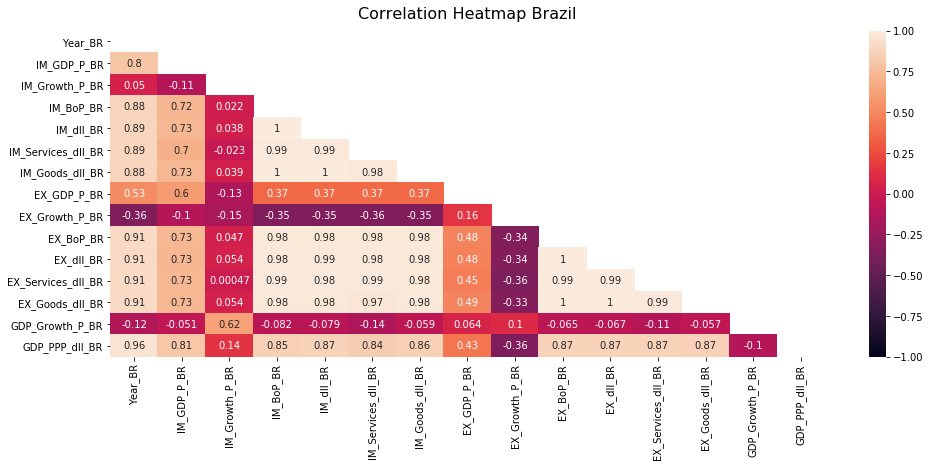

In [72]:
plt.figure(figsize=(16,6))

mask = np.triu(np.ones_like(Brazil_80s.corr(),
              dtype=np.bool))

heatmap = sns.heatmap(Brazil_80s.corr(),
                      mask=mask,
                      vmin=-1,
                      vmax=1, 
                      annot=True)

heatmap.set_title('Correlation Heatmap Brazil', 
                  fontdict={'fontsize':16},
                 pad=12);

High positive correlation between Imports and Exports, showing the dependency between the two and why the Balance of Payments is used as a measure to a country's economic 'well-being'. Economic policies often have an impact on a country's BoP, because these typically target a country's interaction with the rest of the world. 

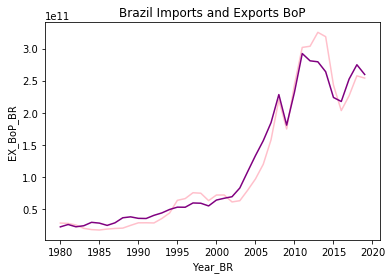

In [73]:
sns.lineplot(data = Brazil_80s, 
            x = 'Year_BR', 
            y = 'IM_BoP_BR',
            color='pink'),

sns.lineplot(data = Brazil_80s, 
            x = 'Year_BR', 
            y = 'EX_BoP_BR',
            color='purple').set_title('Brazil Imports and Exports BoP');

Brazil was importing more during 2010 - 2015, which could've potentially caused some deficiencies in the BoP.
Negative trade balance. 

In [74]:
# Japan has no data from its BoP until 1995
Japan_90s = Japan_80s.iloc[15:]
Japan_90s.reset_index(drop=True, inplace=True)


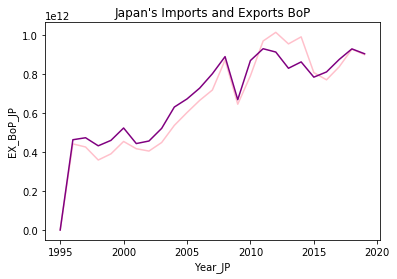

In [75]:
sns.lineplot(data = Japan_90s, 
            x = 'Year_JP', 
            y = 'IM_BoP_JP',
            color='pink'),

sns.lineplot(data = Japan_90s, 
            x = 'Year_JP', 
            y = 'EX_BoP_JP',
            color='purple').set_title("Japan's Imports and Exports BoP");

From 1996 until 2009, Japan enjoyed a trade surplus, enhancing their strategy of an export-oriented economy. 

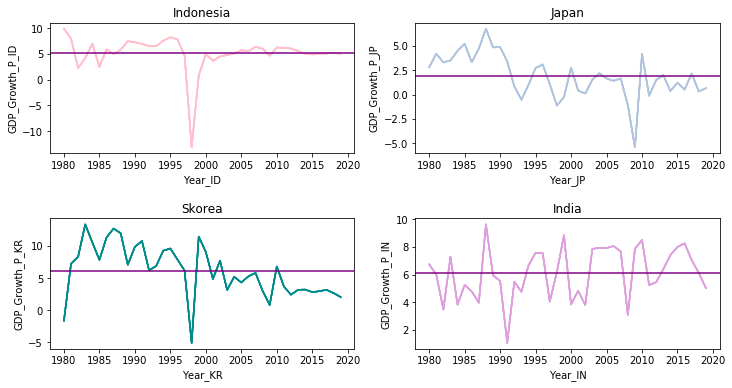

In [116]:
fig, axes = plt.subplots(nrows = 2,
                       ncols = 2,
                       figsize=(12,6))
plt.subplots_adjust(hspace = 0.5)

for ax in axes.flat:

    sns.lineplot(data = Indonesia_80s, 
            x = 'Year_ID', 
            y = 'GDP_Growth_P_ID',
            color='pink',
            ax=axes[0,0])

    sns.lineplot(data = Japan_80s, 
            x = 'Year_JP', 
            y = 'GDP_Growth_P_JP',
            color='lightsteelblue',
            ax=axes[0,1])

    sns.lineplot(data = Skorea_80s, 
            x = 'Year_KR', 
            y = 'GDP_Growth_P_KR',
            color='darkcyan',
            ax=axes[1,0])

    sns.lineplot(data = India_80s, 
            x = 'Year_IN', 
            y = 'GDP_Growth_P_IN',
            color='plum',
            ax=axes[1,1])

axes[0,0].set_title('Indonesia');
axes[0,1].set_title('Japan');
axes[1,0].set_title('Skorea');
axes[1,1].set_title('India');

axes[0,0].axhline(Indonesia_80s['GDP_Growth_P_ID'].mean(), color='purple')
axes[0,1].axhline(Japan_80s['GDP_Growth_P_JP'].mean(), color='purple')
axes[1,0].axhline(Skorea_80s['GDP_Growth_P_KR'].mean(), color='purple')
axes[1,1].axhline(India_80s['GDP_Growth_P_IN'].mean(), color='purple');

    There has been a decrease in all four countries over the years in the percentage of GDP. This goes to show that the initial acceleration that the countries enjoyed is becoming stabilized (except for India). 
    India had a great frop in 2016, due to 'demonetisation' and because it introduced a tax on goods and services.  
     Both South Korea and Indonesia were affected in 1997 by the Asian financial crisis. 
     Indonesia, South Korea and India have a high average GDP percentage of growth, whereas Japan's is lower.  

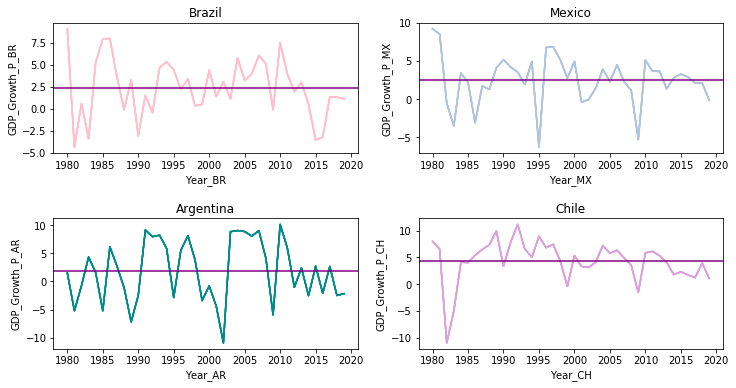

In [117]:
fig, axes = plt.subplots(nrows = 2,
                       ncols = 2,
                       figsize=(12,6))
plt.subplots_adjust(hspace = 0.5)

for ax in axes.flat:

    sns.lineplot(data = Brazil_80s, 
            x = 'Year_BR', 
            y = 'GDP_Growth_P_BR',
            color='pink',
            ax=axes[0,0])

    sns.lineplot(data = Mexico_80s, 
            x = 'Year_MX', 
            y = 'GDP_Growth_P_MX',
            color='lightsteelblue',
            ax=axes[0,1])

    sns.lineplot(data = Argentina_80s, 
            x = 'Year_AR', 
            y = 'GDP_Growth_P_AR',
            color='darkcyan',
            ax=axes[1,0])

    sns.lineplot(data = Chile_80s, 
            x = 'Year_CH', 
            y = 'GDP_Growth_P_CH',
            color='plum',
            ax=axes[1,1])

axes[0,0].set_title('Brazil');
axes[0,1].set_title('Mexico');
axes[1,0].set_title('Argentina');
axes[1,1].set_title('Chile');

axes[0,0].axhline(Brazil_80s['GDP_Growth_P_BR'].mean(), color='purple')
axes[0,1].axhline(Mexico_80s['GDP_Growth_P_MX'].mean(), color='purple')
axes[1,0].axhline(Argentina_80s['GDP_Growth_P_AR'].mean(), color='purple')
axes[1,1].axhline(Chile_80s['GDP_Growth_P_CH'].mean(), color='purple');

       For the Latin American countries there has been less stability or a particular trend showing when it comes to GDP growth. Brazil and Chile have suffered of political turmoil; Argentina has sufferedof period of high inflation and unemploymet; Mexico's dependence to the USA has a great impact on how the county's economy acts. All of these countries withstood financial crisis and went through a change of their imports and exports strategies. 

In [ ]:
#GDP per capita/ PPP values are missing until the 1990s. In order to have a clearer view
#on this variable, will assign new variables

# Asian countries
Indonesia_90s = Indonesia_80s.iloc[15:]
Skorea_90s = Skorea_80s.iloc[15:]
India_90s = India_80s.iloc[15:]

#LA countries
Brazil_90s = Brazil_80s.iloc[15:]
Mexico_90s = Mexico_80s.iloc[15:]
Argentina_90s = Argentina_80s.iloc[15:]
Chile_90s = Chile_80s.iloc[15:]

# Index
Indonesia_90s.reset_index(drop=True, inplace=True)  
Skorea_90s.reset_index(drop=True, inplace=True) 
India_90s.reset_index(drop=True, inplace=True) 

Brazil_90s.reset_index(drop=True, inplace=True) 
Mexico_90s.reset_index(drop=True, inplace=True) 
Argentina_90s.reset_index(drop=True, inplace=True) 
Chile_90s.reset_index(drop=True, inplace=True) 

In [80]:
Brazil_90s.head()

,Year_BR,IM_GDP_P_BR,IM_Growth_P_BR,IM_BoP_BR,IM_dll_BR,IM_Services_dll_BR,IM_Goods_dll_BR,EX_GDP_P_BR,EX_Growth_P_BR,EX_BoP_BR,EX_dll_BR,EX_Services_dll_BR,EX_Goods_dll_BR,GDP_Growth_P_BR,GDP_PPP_dll_BR,Country_BR
0,1995,9.456,30.687,63293000000.000,72742324397.951,13630000000.000,49663000000.000,7.529,-2.033,52641000000.000,57920041189.931,6135000000.000,46506000000.000,4.417,8090.890,BR
1,1996,8.905,5.586,66018000000.000,75733720724.306,12717000000.000,53301000000.000,6.730,-0.421,52506000000.000,57235482141.080,4760000000.000,47746000000.000,2.208,8288.179,BR
2,1997,9.593,14.595,75139000000.000,84721451205.937,15301000000.000,59838000000.000,6.984,11.019,59178000000.000,61679566883.117,6187000000.000,52991000000.000,3.395,8582.068,BR
3,1998,9.408,-0.057,74415000000.000,81259829211.547,16704000000.000,57711000000.000,7.030,4.908,58767000000.000,60724077380.439,7646000000.000,51121000000.000,0.338,8575.873,BR
4,1999,11.417,-15.094,62807000000.000,68433801840.525,13798000000.000,49009000000.000,9.565,5.706,54563000000.000,57330907863.559,6300000000.000,48263000000.000,0.468,8611.900,BR


### GDP/PPP to be able to compare the PPP across countries over the years

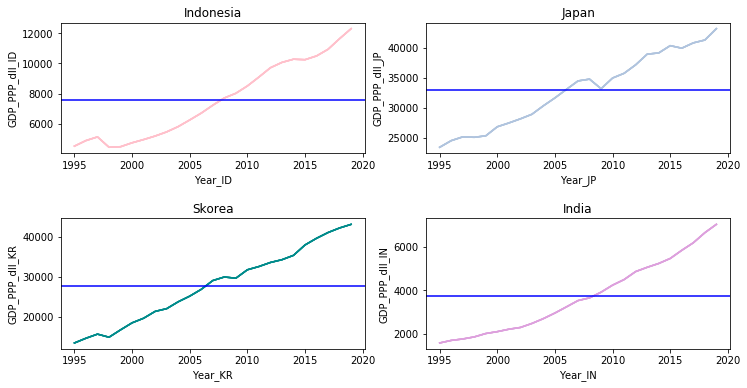

In [126]:
fig, axes = plt.subplots(nrows = 2,
                       ncols = 2,
                       figsize=(12,6))
plt.subplots_adjust(hspace = 0.5)

for ax in axes.flat:

    sns.lineplot(data = Indonesia_90s, 
            x = 'Year_ID', 
            y = 'GDP_PPP_dll_ID',
            color='pink',
            ax=axes[0,0])

    sns.lineplot(data = Japan_90s, 
            x = 'Year_JP', 
            y = 'GDP_PPP_dll_JP',
            color='lightsteelblue',
            ax=axes[0,1])

    sns.lineplot(data = Skorea_90s, 
            x = 'Year_KR', 
            y = 'GDP_PPP_dll_KR',
            color='darkcyan',
            ax=axes[1,0])

    sns.lineplot(data = India_90s, 
            x = 'Year_IN', 
            y = 'GDP_PPP_dll_IN',
            color='plum',
            ax=axes[1,1])

axes[0,0].set_title('Indonesia');
axes[0,1].set_title('Japan');
axes[1,0].set_title('Skorea');
axes[1,1].set_title('India');

axes[0,0].axhline(Indonesia_90s['GDP_PPP_dll_ID'].mean(), color='b')
axes[0,1].axhline(Japan_90s['GDP_PPP_dll_JP'].mean(), color='b')
axes[1,0].axhline(Skorea_90s['GDP_PPP_dll_KR'].mean(), color='b')
axes[1,1].axhline(India_90s['GDP_PPP_dll_IN'].mean(), color='b');

### The countries GDP per capita (PPP) has been growing over the years, showing a positive trend. 

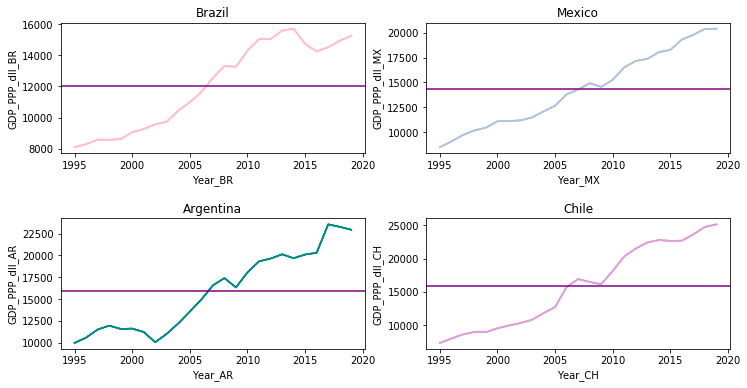

In [128]:
fig, axes = plt.subplots(nrows = 2,
                       ncols = 2,
                       figsize=(12,6))
plt.subplots_adjust(hspace = 0.5)

for ax in axes.flat:

    sns.lineplot(data = Brazil_90s, 
            x = 'Year_BR', 
            y = 'GDP_PPP_dll_BR',
            color='pink',
            ax=axes[0,0])

    sns.lineplot(data = Mexico_90s, 
            x = 'Year_MX', 
            y = 'GDP_PPP_dll_MX',
            color='lightsteelblue',
            ax=axes[0,1])

    sns.lineplot(data = Argentina_90s, 
            x = 'Year_AR', 
            y = 'GDP_PPP_dll_AR',
            color='darkcyan',
            ax=axes[1,0])

    sns.lineplot(data = Chile_90s, 
            x = 'Year_CH', 
            y = 'GDP_PPP_dll_CH',
            color='plum',
            ax=axes[1,1])

axes[0,0].set_title('Brazil');
axes[0,1].set_title('Mexico');
axes[1,0].set_title('Argentina');
axes[1,1].set_title('Chile');

#axes[0,0].axhline(Brazil_90s['GDP_PPP_dll_BR'].mean(), color='purple')
#axes[0,1].axhline(Mexico_90s['GDP_PPP_dll_MX'].mean(), color='purple')
#axes[1,0].axhline(Argentina_90s['GDP_PPP_dll_AR'].mean(), color='purple')
#axes[1,1].axhline(Chile_90s['GDP_PPP_dll_CH'].mean(), color='purple');


        Latin American countries showing a positive trend. 

## Exploring data with different graphs

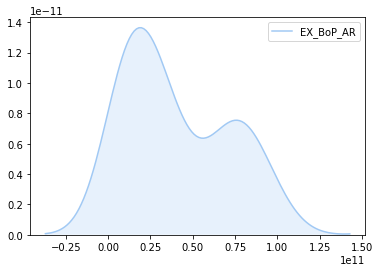

In [119]:
ax = sns.kdeplot(Argentina_80s['EX_BoP_AR'], shade=True)

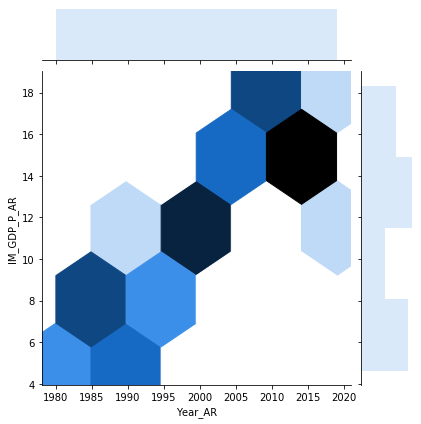

In [85]:
sns.jointplot('Year_AR', 'IM_GDP_P_AR', Argentina_80s, kind='hex')

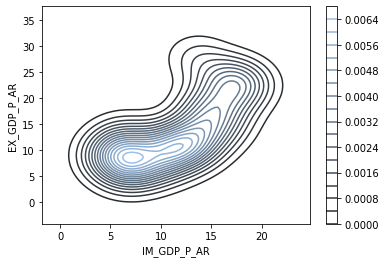

In [90]:
sns.kdeplot(Argentina_80s['IM_GDP_P_AR'], Argentina_80s['EX_GDP_P_AR'], n_levels=20, cbar=True);

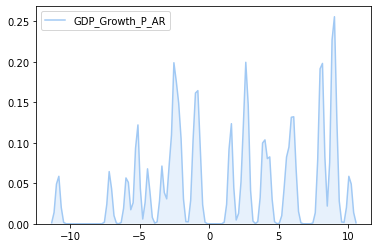

In [94]:
sns.kdeplot(Argentina_80s['GDP_Growth_P_AR'], bw=.15, shade=True);

Argentina's high fluctuations

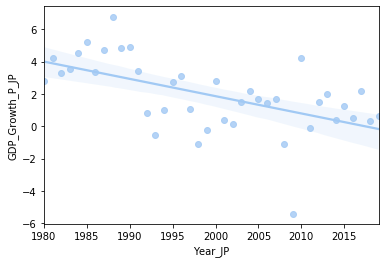

In [100]:
sns.regplot(data=Japan_80s, 
           x='Year_JP',
           y='GDP_Growth_P_JP');

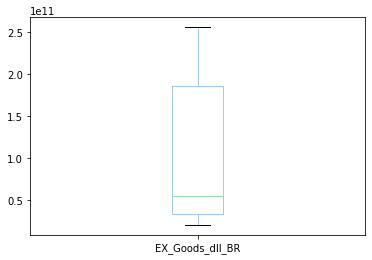

In [102]:
Brazil_80s['EX_Goods_dll_BR'].plot(kind='box')

## One dataframe for all the countries to compare the countries and cluster the Latin American countries and Asian countries

In [134]:
Brazil_80s.shape

(40, 16)

In [137]:
countries_list = [Mexico_80s, Argentina_80s, Chile_80s, Indonesia_80s, Japan_80s, Skorea_80s, India_80s]

In [139]:
df_countries = Brazil_80s.join(countries_list)

In [140]:
df_countries.columns

Index(['Year_BR', 'IM_GDP_P_BR', 'IM_Growth_P_BR', 'IM_BoP_BR', 'IM_dll_BR',
       'IM_Services_dll_BR', 'IM_Goods_dll_BR', 'EX_GDP_P_BR',
       'EX_Growth_P_BR', 'EX_BoP_BR',
       ...
       'IM_Goods_dll_IN', 'EX_GDP_P_IN', 'EX_Growth_P_IN', 'EX_BoP_IN',
       'EX_dll_IN', 'EX_Services_dll_IN', 'EX_Goods_dll_IN', 'GDP_Growth_P_IN',
       'GDP_PPP_dll_IN', 'Country_IN'],
      dtype='object', length=128)

In [141]:
df_countries.transpose()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Year_BR,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
IM_GDP_P_BR,11.306,9.799,8.274,9.008,7.924,7.095,6.355,6.193,5.692,5.461,...,11.907,12.352,13.237,14.044,13.674,14.053,12.067,11.805,14.508,14.654
IM_Growth_P_BR,0.677,-12.357,-6.031,-17.433,-2.941,0.000,28.680,-2.944,-1.127,8.940,...,33.639,9.393,1.131,6.670,-2.272,-14.191,-10.342,6.717,8.344,1.105
IM_BoP_BR,27826000000.000,27229000000.000,24792000000.000,19560000000.000,17612000000.000,16958000000.000,18433000000.000,19368000000.000,19907000000.000,24180000000.000,...,243660936841.030,302029366543.060,303848045030.470,325571419168.280,318799145127.770,243145561020.600,203426770539.700,226514898036.350,257663477835.220,254149123847.620
IM_dll_BR,26571483279.660,25827534749.120,23307743170.814,18314364418.708,16563864377.329,15818492271.929,17038985216.653,18211636976.151,18807996682.174,23242900390.625,...,263001364256.480,323150406504.065,326310480774.154,347274708965.261,335819379515.512,253273317502.780,216687480308.195,243509744939.525,273547364661.448,269601911015.338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EX_Services_dll_IN,2971257228.180,2797358479.033,2932696123.203,3290114665.844,3232033318.441,3384170907.607,3228227514.141,3363400778.860,3791282738.484,4139799056.965,...,117068311674.444,138527915664.694,145524596558.416,149163631866.117,157196138163.656,156278173575.950,161818782927.696,185294014276.933,204955578853.907,214364494398.131
EX_Goods_dll_IN,8303140035.189,8437352246.949,9226332695.770,9769874984.704,10191575182.553,9465033878.334,10248046787.949,11884034801.049,13509794583.150,16143880745.994,...,230967060094.886,307847488405.908,298320584199.861,319109794565.316,328386908293.941,272352729600.000,268614705000.000,304106898883.260,332086853293.320,331341926429.220
GDP_Growth_P_IN,6.736,6.006,3.476,7.289,3.821,5.254,4.777,3.965,9.628,5.947,...,8.498,5.241,5.456,6.386,7.410,7.996,8.256,7.044,6.120,5.024
GDP_PPP_dll_IN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,4236.744,4493.668,4861.146,5057.218,5233.868,5464.859,5839.899,6185.994,6650.112,7034.217


In [143]:
df_countries.to_csv('df_countries.csv', index=False)